# Housing Price Prediction Capstone Project - Feature Selection

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from boruta import BorutaPy
from xgboost import XGBClassifier
from xgboost import plot_importance
from library.sb_utils import save_file

In [2]:
df = pd.read_csv("Data files\data_preprocessed.csv")

In [3]:
pd.set_option('display.max_rows', 500)

In [4]:
df.head().T

,0,1,2,3,4
SalePrice,208500.000000,181500.000000,223500.000000,250000.000000,307000.000000
LotFrontage,0.279857,0.760132,0.375912,0.888205,0.600040
LotArea,-0.217666,0.078136,0.502548,1.276779,0.202631
MasVnrArea,0.888197,-0.619443,0.626668,2.072771,0.811277
BsmtFinSF1,0.682376,1.339277,0.151058,0.559207,2.283573
TotalBsmtSF,-0.393202,0.679639,-0.224084,0.370470,1.800044
1stFlrSF,-0.754347,0.478393,-0.560023,0.123145,1.790077
2ndFlrSF,1.344658,-0.786663,1.374606,1.841300,-0.786663
GrLivArea,0.692021,-0.376695,0.873321,1.856159,0.653853
BsmtFullBath,1.167737,-0.781921,1.167737,1.167737,1.167737


In [5]:
df.columns

Index(['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       ...
       'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'Fence_GdPrv',
       'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_None',
       'MiscFeature_None', 'MiscFeature_Shed'],
      dtype='object', length=140)

In [6]:
from sklearn.model_selection import train_test_split

X=df.drop(columns='SalePrice')
y=df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [7]:
X_train.shape, X_test.shape

((795, 139), (342, 139))

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

In [9]:
rng = np.random.RandomState(0)
bin_var = pd.Series(rng.randint(0, 1, X.shape[0]), name='rnd_bin')
num_var = pd.Series(np.arange(X.shape[0]), name='rnd_num')
X_with_rnd_feat = pd.concat((X, bin_var, num_var), axis=1)

## Basic Linear Model

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
lr = LinearRegression()
lr.fit(X_tr_scaled, y_train)

LinearRegression()

In [12]:
y_tr_pred = lr.predict(X_tr_scaled)
y_te_pred = lr.predict(X_te_scaled)

In [13]:
r2_score(y_test, y_te_pred), r2_score(y_train, y_tr_pred)

(-2.961691577709352e+20, 0.9211972328886345)

### Non-scaled Data

In [14]:
y_tr_pred = lr.predict(X_train)
y_te_pred = lr.predict(X_test)

In [15]:
r2_score(y_test, y_te_pred), r2_score(y_train, y_tr_pred)

(-8.8440756915353e+20, -9.00241514559652e+20)

In [16]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(1332566399586751.0, 1312683854282343.8)

In [17]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(3.719592437646294e+30, 3.5884970745960116e+30)

## Feature Selection

We will start by adding a random predictor variable to compare our other features against, anything that performs worse than these random values, will be removed from our model.

In [18]:
#creating random predictor variable
rng = np.random.RandomState(0)
bin_var = pd.Series(rng.randint(0, 1, X.shape[0]), name='rnd_bin')
num_var = pd.Series(np.arange(X.shape[0]), name='rnd_num')
X_with_rnd_feat = pd.concat((X, bin_var, num_var), axis=1)

In [19]:
#Re-split dataset with new random feature added
X_train, X_test, y_train, y_test = train_test_split(X_with_rnd_feat, y,
                                                    random_state=42)

### RidgeCV

In [20]:
rcv = RidgeCV()
rcv.fit(X_train, y_train)

print(f'model score on training data: {rcv.score(X_train, y_train)}')
print(f'model score on testing data: {rcv.score(X_test, y_test)}')

model score on training data: 0.9154929569961885
model score on testing data: 0.8706234078167737


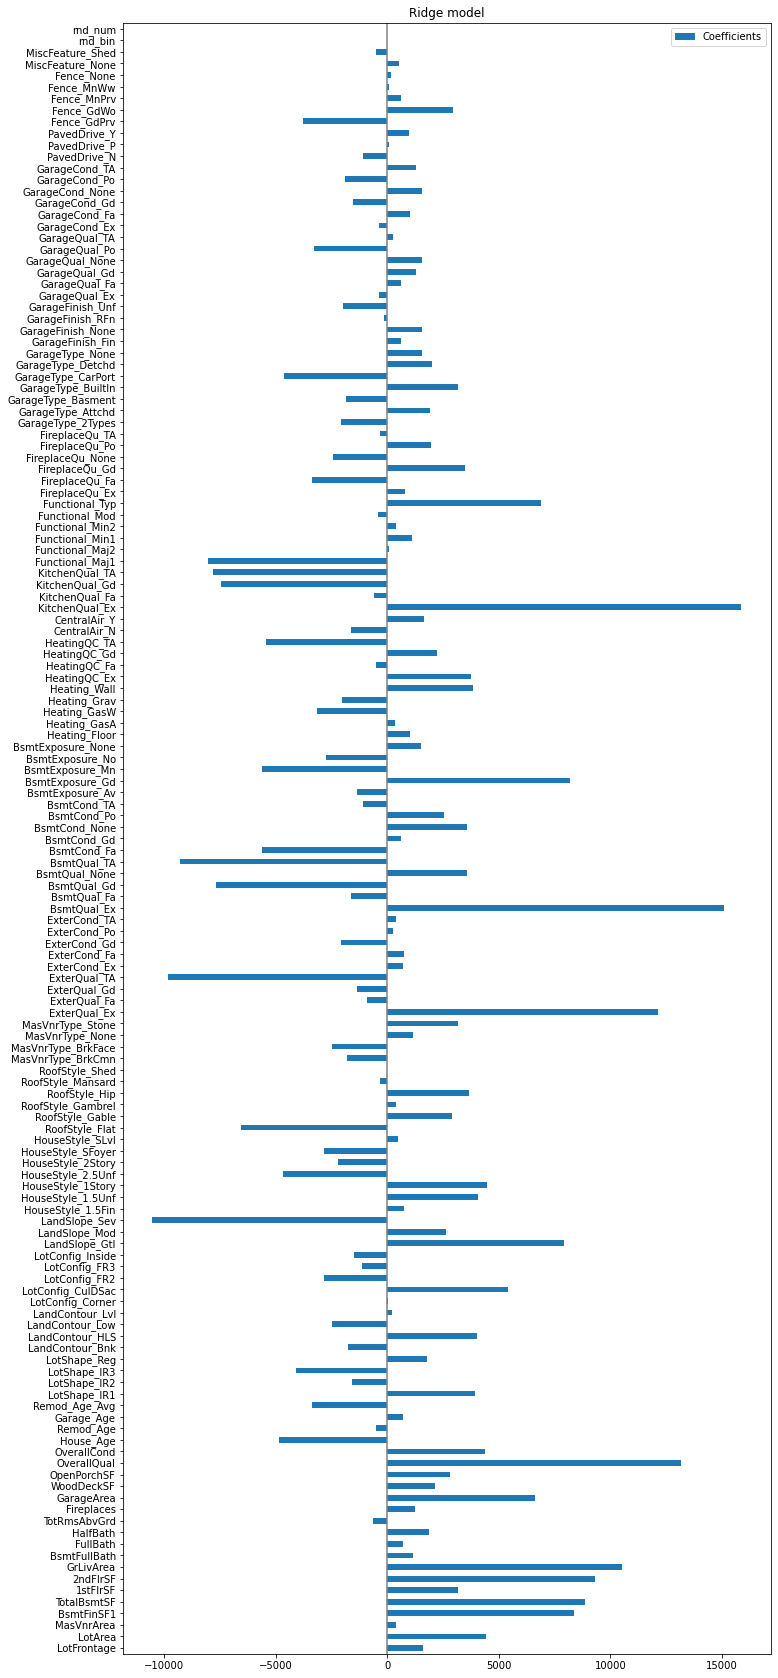

In [21]:
coefs = pd.DataFrame(
   rcv.coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(15,30))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### RidgeCV with StandardScaler

In [22]:
model = make_pipeline(StandardScaler(), RidgeCV())
model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9222721124108665
model score on testing data: 0.8296127521244222


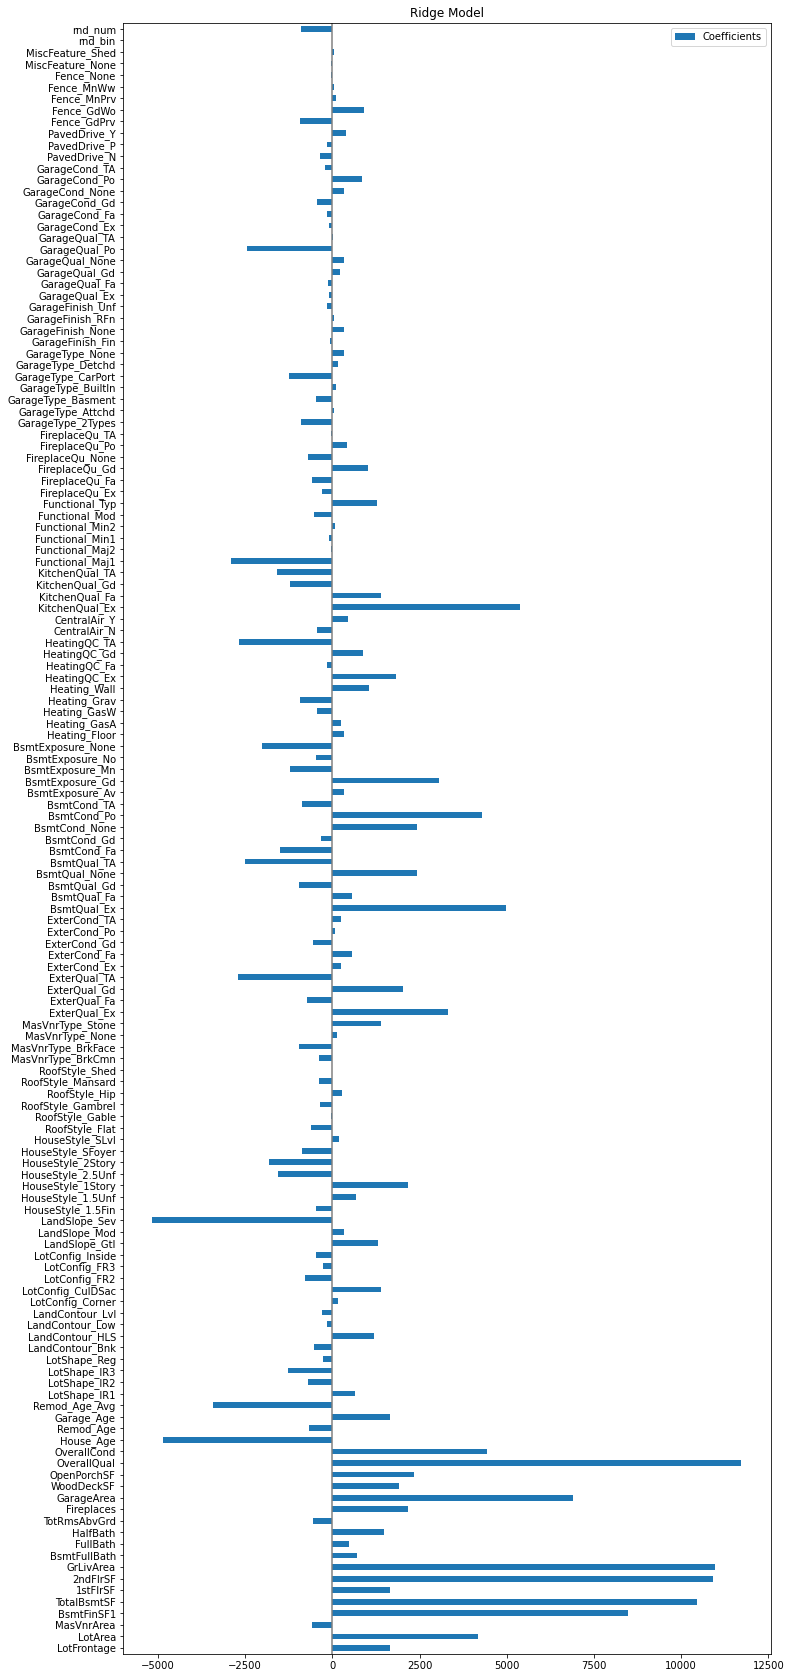

In [23]:
coefs = pd.DataFrame(
    model[1].coef_,
    columns=['Coefficients'], index=X_train.columns)

coefs.plot(kind='barh', figsize=(15,30))
plt.title('Ridge Model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

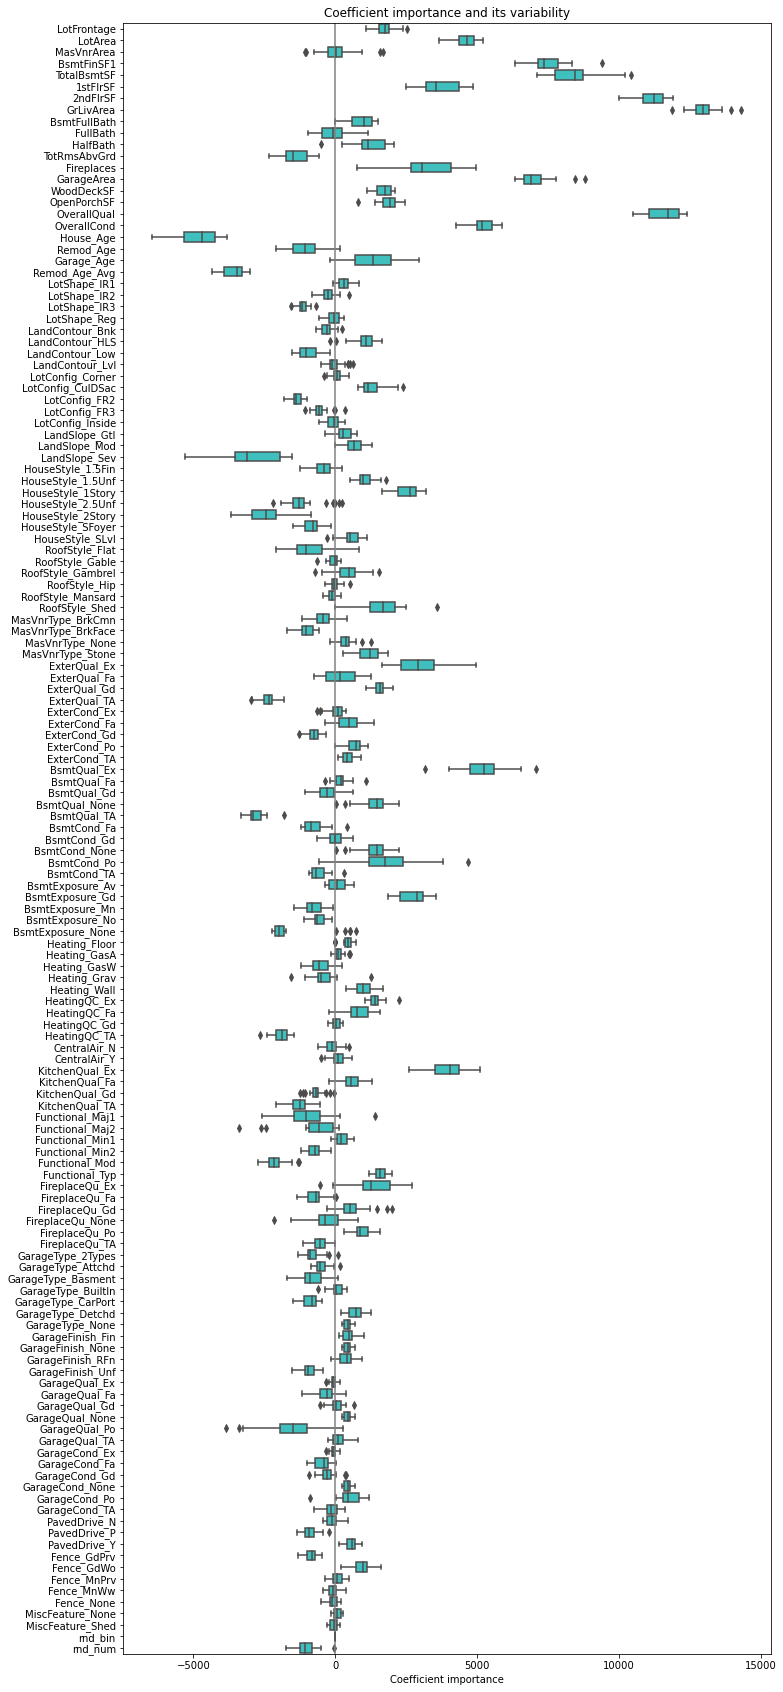

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
   model, X_with_rnd_feat, y, cv=RepeatedKFold(n_splits=5, n_repeats=5),
   return_estimator=True, n_jobs=2
)
coefs = pd.DataFrame(
   [model[1].coef_
    for model in cv_model['estimator']],
   columns=X_with_rnd_feat.columns
)
plt.figure(figsize=(15, 30))
sns.boxplot(data=coefs, orient='h', color='cyan', saturation=0.5)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

In [25]:
print(np.mean(coefs).sort_values(ascending=False))

GrLivArea             12989.741109
OverallQual           11598.280241
2ndFlrSF              11135.252775
TotalBsmtSF            8436.796417
BsmtFinSF1             7518.223445
GarageArea             7029.736584
BsmtQual_Ex            5227.392578
OverallCond            5167.927787
LotArea                4603.342860
KitchenQual_Ex         3917.889064
1stFlrSF               3697.858581
Fireplaces             3178.202593
ExterQual_Ex           2911.966340
BsmtExposure_Gd        2751.048072
HouseStyle_1Story      2483.329351
OpenPorchSF            1883.240675
BsmtCond_Po            1785.187475
LotFrontage            1748.678926
WoodDeckSF             1663.745000
Functional_Typ         1575.235522
ExterQual_Gd           1570.028704
RoofStyle_Shed         1541.533825
HeatingQC_Ex           1415.353400
BsmtCond_None          1350.527887
BsmtQual_None          1350.527887
Garage_Age             1345.305414
FireplaceQu_Ex         1327.373388
LotConfig_CulDSac      1314.770112
HalfBath            

### Random Forest 

In [26]:
rfr1 = RandomForestRegressor()
rfr1.fit(X_train, y_train)

print(f'model score on training data: {rfr1.score(X_train, y_train)}')
print(f'model score on testing data: {rfr1.score(X_test, y_test)}')

model score on training data: 0.9841540576560168
model score on testing data: 0.8727217890802277


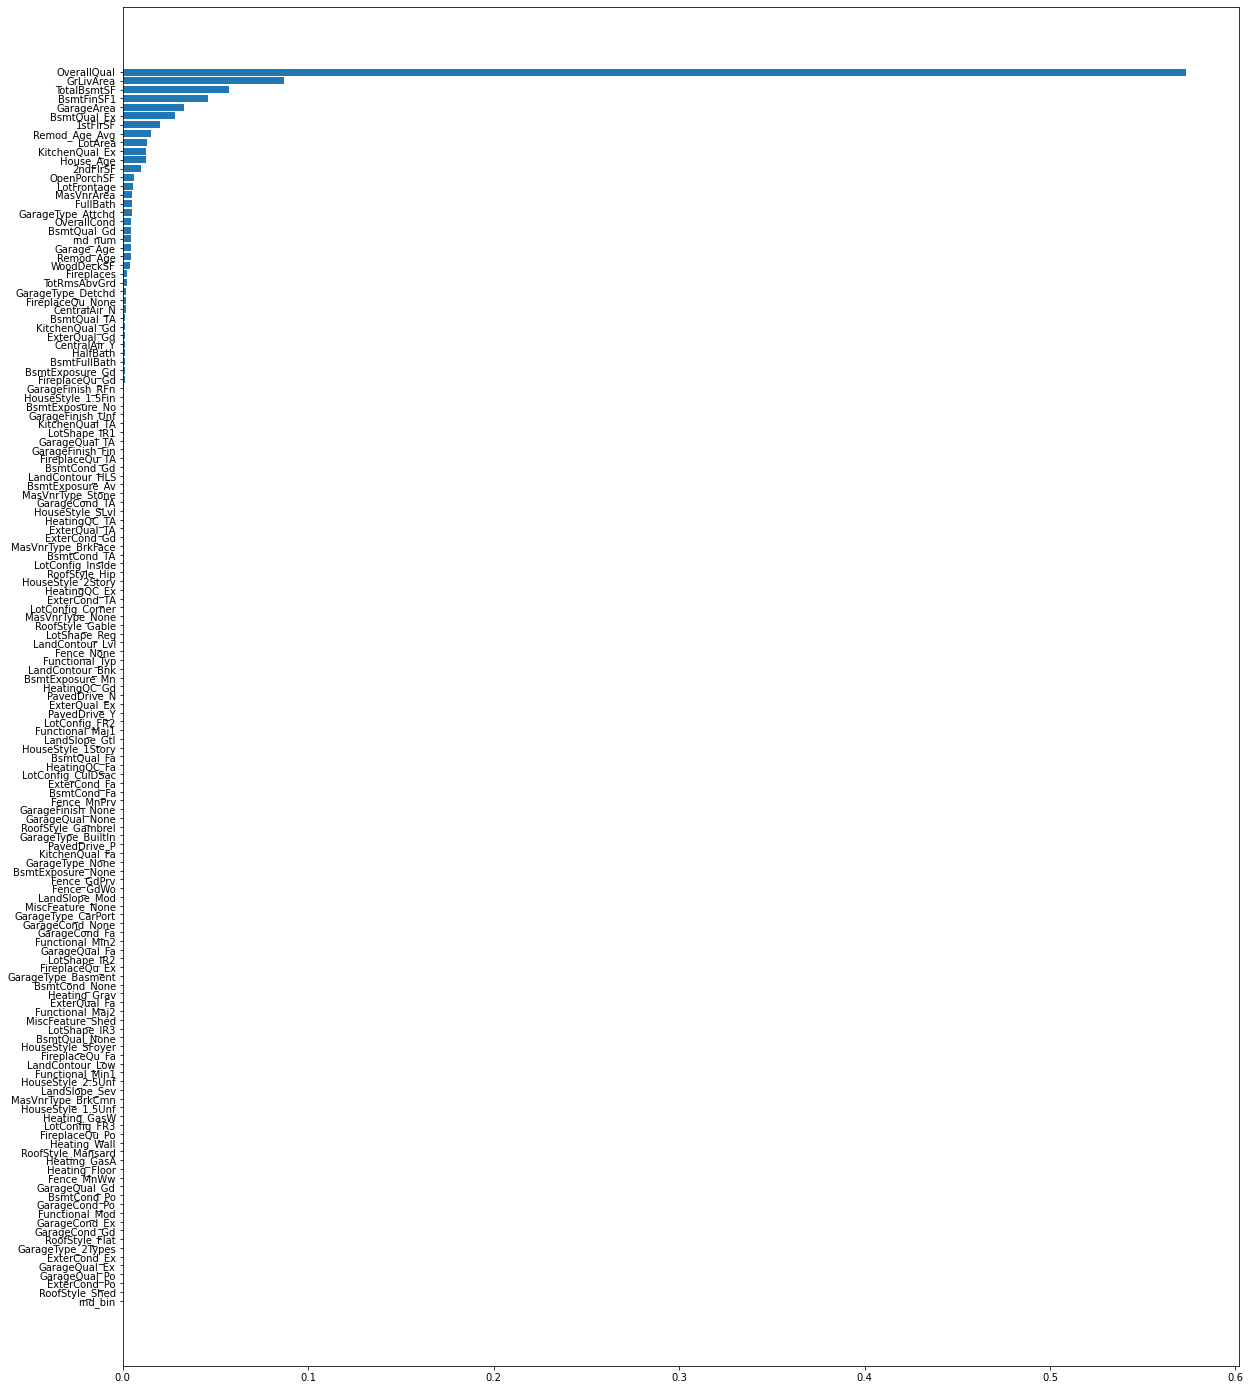

In [27]:
imps = rfr1.feature_importances_
feat_imps = imps
indices = np.argsort(feat_imps)

fix,ax = plt.subplots(figsize=(20,25))
ax.barh(range(len(feat_imps)), feat_imps[indices])
ax.set_yticks(range(len(feat_imps)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [28]:
pd.Series(rfr1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

OverallQual           5.731989e-01
GrLivArea             8.674127e-02
TotalBsmtSF           5.728335e-02
BsmtFinSF1            4.582462e-02
GarageArea            3.284176e-02
BsmtQual_Ex           2.840416e-02
1stFlrSF              2.009247e-02
Remod_Age_Avg         1.538988e-02
LotArea               1.304444e-02
KitchenQual_Ex        1.253603e-02
House_Age             1.247045e-02
2ndFlrSF              9.792046e-03
OpenPorchSF           5.810091e-03
LotFrontage           5.584538e-03
MasVnrArea            5.043819e-03
FullBath              4.862693e-03
GarageType_Attchd     4.847443e-03
OverallCond           4.631674e-03
BsmtQual_Gd           4.554052e-03
rnd_num               4.523906e-03
Garage_Age            4.490176e-03
Remod_Age             4.320964e-03
WoodDeckSF            4.023190e-03
Fireplaces            2.357263e-03
TotRmsAbvGrd          2.205474e-03
GarageType_Detchd     1.903096e-03
FireplaceQu_None      1.714168e-03
CentralAir_N          1.480798e-03
BsmtQual_TA         

In [29]:
rfr1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### RF with hyperparameter tuning

In [30]:
rfr2 = RandomForestRegressor(
         n_estimators=100,
         min_samples_leaf=1,
         n_jobs=-1,
         oob_score=True)
rfr2.fit(X_train, y_train)

print(f'model score on training data: {rfr2.score(X_train, y_train)}')
print(f'model score on testing data: {rfr2.score(X_test, y_test)}')

model score on training data: 0.983326848483649
model score on testing data: 0.8706860080911663


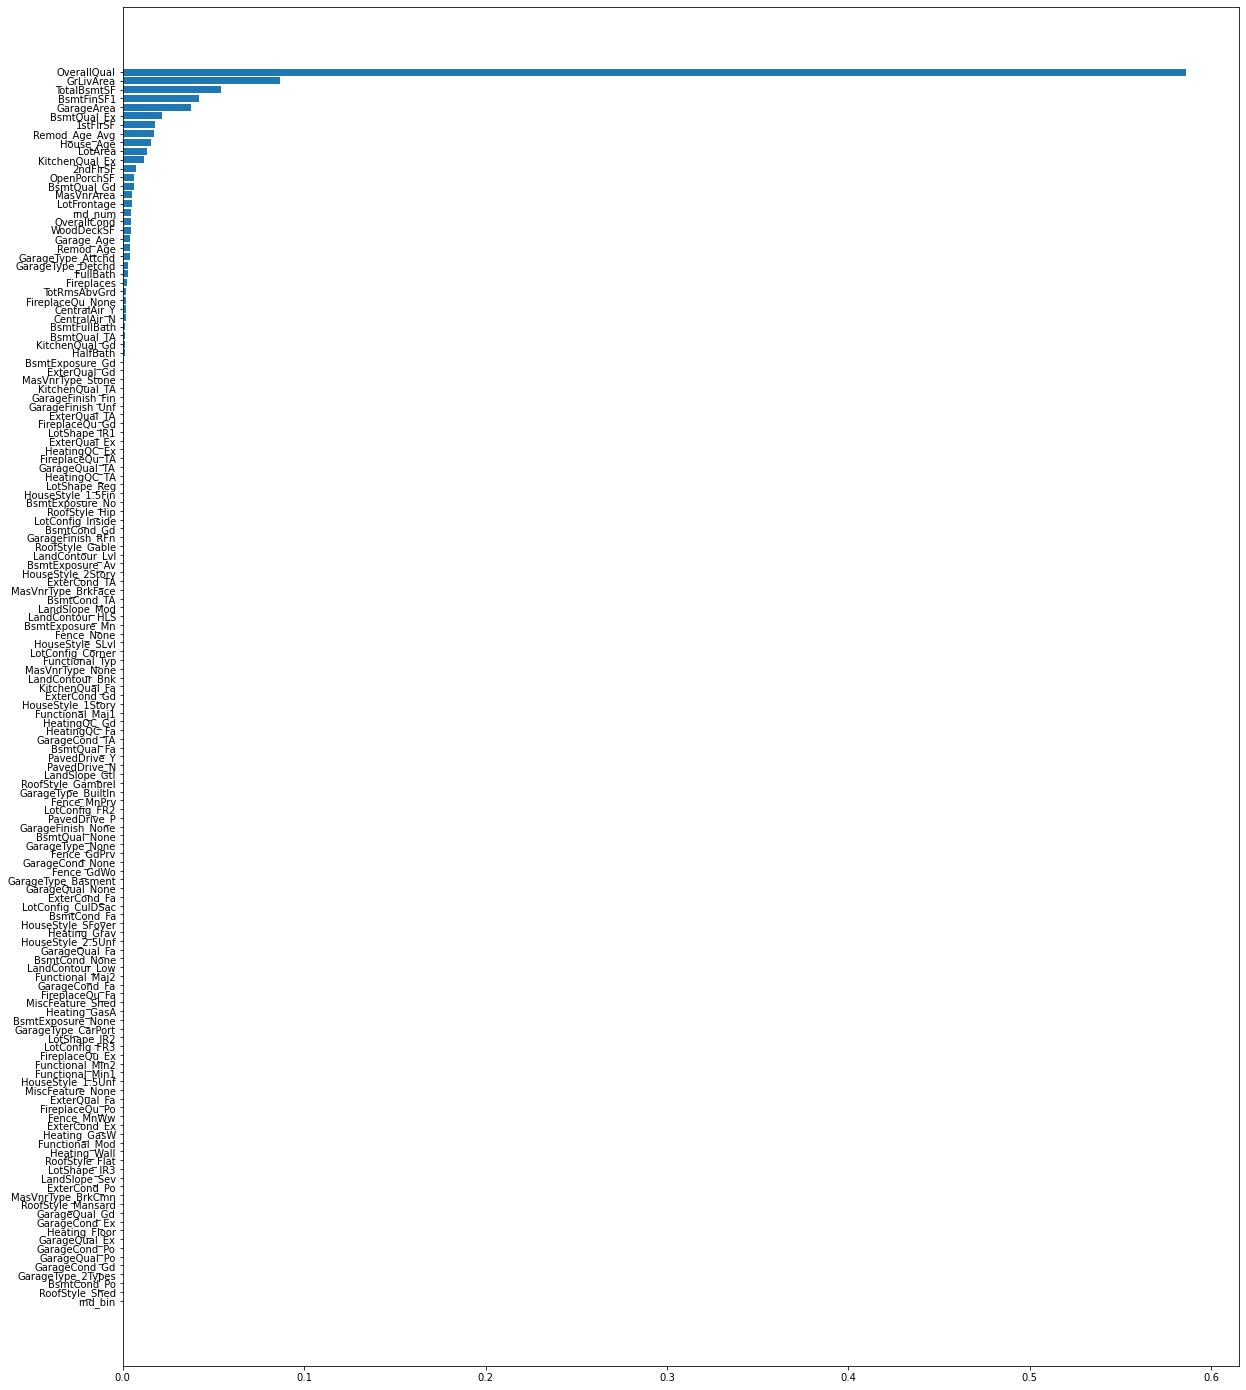

In [31]:
imps = rfr2.feature_importances_
feat_imps = imps
indices = np.argsort(feat_imps)

fix,ax = plt.subplots(figsize=(20,25))
ax.barh(range(len(feat_imps)), feat_imps[indices])
ax.set_yticks(range(len(feat_imps)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [32]:
feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
feat_imps

OverallQual           5.860532e-01
GrLivArea             8.676712e-02
TotalBsmtSF           5.433860e-02
BsmtFinSF1            4.219824e-02
GarageArea            3.768168e-02
BsmtQual_Ex           2.145617e-02
1stFlrSF              1.754362e-02
Remod_Age_Avg         1.702048e-02
House_Age             1.570757e-02
LotArea               1.344356e-02
KitchenQual_Ex        1.173993e-02
2ndFlrSF              7.480179e-03
OpenPorchSF           6.380189e-03
BsmtQual_Gd           6.099786e-03
MasVnrArea            4.941071e-03
LotFrontage           4.804274e-03
rnd_num               4.695654e-03
OverallCond           4.398810e-03
WoodDeckSF            4.269182e-03
Garage_Age            4.201652e-03
Remod_Age             4.093397e-03
GarageType_Attchd     3.752018e-03
GarageType_Detchd     3.005808e-03
FullBath              2.799248e-03
Fireplaces            2.294785e-03
TotRmsAbvGrd          2.002394e-03
FireplaceQu_None      1.726549e-03
CentralAir_Y          1.556262e-03
CentralAir_N        

In [33]:
rfr2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

These results look promising, as the square footage of the home should be one of, if not, the best predictor of home value. However, our random number feature we added appears #13 on this list, which means a vast majority of our other features are not very useful, or at least not in this permutation. 

### Feature Importance through Permutations with Random Forest

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from distutils.version import LooseVersion
if LooseVersion(sklearn.__version__) >= LooseVersion("0.24"):
    # In sklearn version 0.24, forest module changed to be private.
    from sklearn.ensemble._forest import _generate_unsampled_indices
    from sklearn.ensemble import _forest as forest
else:
    # Before sklearn version 0.24, forest was public, supporting this.
    from sklearn.ensemble.forest import _generate_unsampled_indices
    from sklearn.ensemble import forest

from sklearn.model_selection import cross_val_score
from sklearn.base import clone
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from pandas.api.types import is_numeric_dtype
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FormatStrFormatter
from copy import copy
import warnings
import tempfile
from os import getpid, makedirs

C:\Users\nicho\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [35]:
def permutation_importances(rf, X_train, y_train, metric):
    baseline = metric(rf, X_train, y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        X_train[col] = np.random.permutation(X_train[col])
        m = metric(rf, X_train, y_train)
        X_train[col] = save
        imp.append(baseline - m)
    return np.array(imp)

In [36]:
def oob_regression_r2_score(rf, X_train, y_train):
    """
    Compute out-of-bag (OOB) R^2 for a scikit-learn random forest
    regressor. We learned the guts of scikit's RF from the BSD licensed
    code:
    https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/ensemble/forest.py#L702
    """
    X = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
    y = y_train.values if isinstance(y_train, pd.Series) else y_train

    n_samples = len(X)
    predictions = np.zeros(n_samples)
    n_predictions = np.zeros(n_samples)
    for tree in rf.estimators_:
        unsampled_indices = _get_unsampled_indices(tree, n_samples)
        tree_preds = tree.predict(X[unsampled_indices, :])
        predictions[unsampled_indices] += tree_preds
        n_predictions[unsampled_indices] += 1

    if (n_predictions == 0).any():
        warnings.warn("Too few trees; some variables do not have OOB scores.")
        n_predictions[n_predictions == 0] = 1

    predictions /= n_predictions

    oob_score = r2_score(y, predictions)
    return oob_score

In [37]:
def _get_unsampled_indices(tree, n_samples):
    """
    An interface to get unsampled indices regardless of sklearn version.
    """
    if LooseVersion(sklearn.__version__) >= LooseVersion("0.24"):
        # Version 0.24 moved forest package name
        from sklearn.ensemble._forest import _get_n_samples_bootstrap
        n_samples_bootstrap = _get_n_samples_bootstrap(n_samples, n_samples)
        return _generate_unsampled_indices(tree.random_state, n_samples, n_samples_bootstrap)
    elif LooseVersion(sklearn.__version__) >= LooseVersion("0.22"):
        # Version 0.22 or newer uses 3 arguments.
        from sklearn.ensemble.forest import _get_n_samples_bootstrap
        n_samples_bootstrap = _get_n_samples_bootstrap(n_samples, n_samples)
        return _generate_unsampled_indices(tree.random_state, n_samples, n_samples_bootstrap)
    else:
        # Version 0.21 or older uses only two arguments.
        return _generate_unsampled_indices(tree.random_state, n_samples)

In [38]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
imp = permutation_importances(RF, X_train, y_train, oob_regression_r2_score)

<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

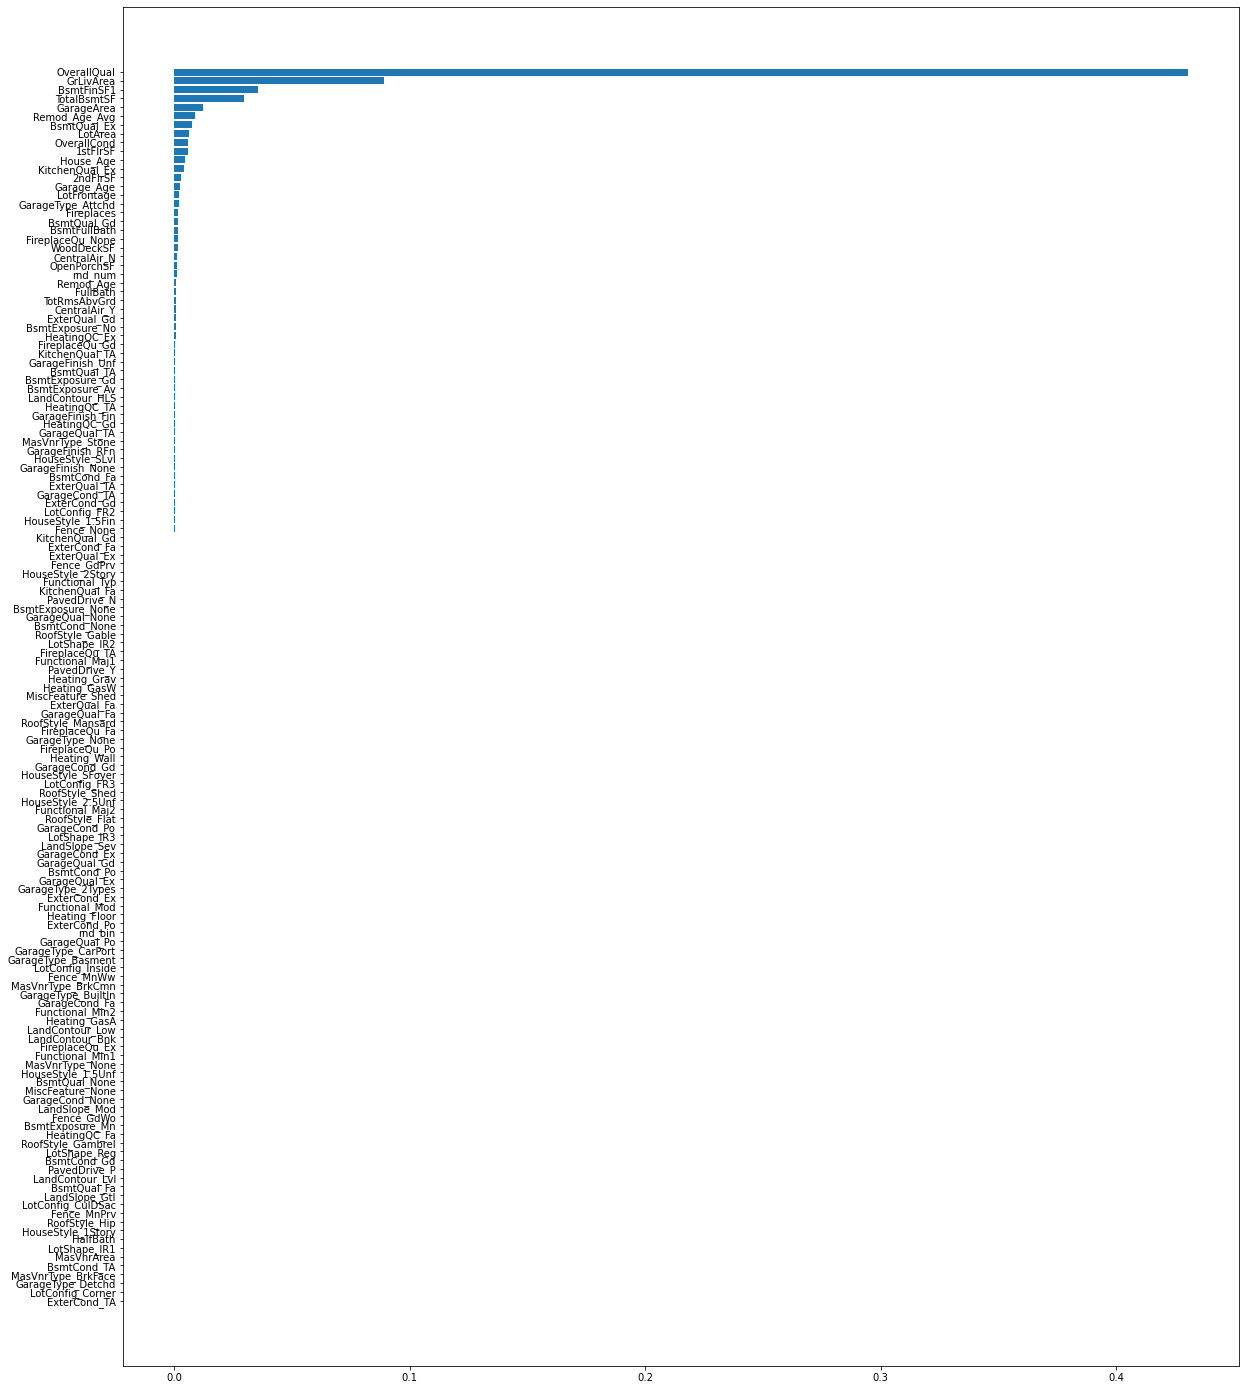

In [39]:
feat_imps = imp
indices = np.argsort(feat_imps)

fix,ax = plt.subplots(figsize=(20,25))
ax.barh(range(len(feat_imps)), feat_imps[indices])
ax.set_yticks(range(len(feat_imps)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [40]:
pd.Series(imp, index=X_train.columns).sort_values(ascending=False)

OverallQual           4.305307e-01
GrLivArea             8.922902e-02
BsmtFinSF1            3.531942e-02
TotalBsmtSF           2.954640e-02
GarageArea            1.208841e-02
Remod_Age_Avg         8.858754e-03
BsmtQual_Ex           7.662484e-03
LotArea               6.278296e-03
OverallCond           5.718665e-03
1stFlrSF              5.714550e-03
House_Age             4.424763e-03
KitchenQual_Ex        4.073894e-03
2ndFlrSF              2.654706e-03
Garage_Age            2.218157e-03
LotFrontage           2.060418e-03
GarageType_Attchd     1.923267e-03
Fireplaces            1.681227e-03
BsmtQual_Gd           1.638185e-03
BsmtFullBath          1.549708e-03
FireplaceQu_None      1.525047e-03
WoodDeckSF            1.443286e-03
CentralAir_N          1.150406e-03
OpenPorchSF           1.075339e-03
rnd_num               1.047957e-03
Remod_Age             6.802434e-04
FullBath              6.749151e-04
TotRmsAbvGrd          6.241960e-04
CentralAir_Y          5.558460e-04
ExterQual_Gd        

In [41]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter tuning

#### RandomizedSearchCV

In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [43]:
# Use the random grid to search for best hyperparameters
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [45]:
rf_random.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'iid': 'deprecated',
 'n_iter': 100,
 'n_jobs': -1,
 'param_distributions': {'n_estimators': [200,
   400,
   600,
   800,
   1000,
   1200,
   1400,
   1600,
   1800,
   2000],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
  'min_samples_split': [2

In [46]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Average Error: 17703.4151 degrees.
Accuracy = 89.12%.
Model Performance
Average Error: 16242.2726 degrees.
Accuracy = 89.95%.
Improvement of 0.93%.


### Permutation again with new parameters

In [47]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [48]:
RF = rf_random.best_estimator_
RF.fit(X_train, y_train)
imp_new_params = permutation_importances(RF, X_train, y_train, oob_regression_r2_score)

<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = save
<ipython-input-35-02a282ac55b1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = np.random.permutation(X_train[col])
<ipython-input-35-02a282ac55b1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

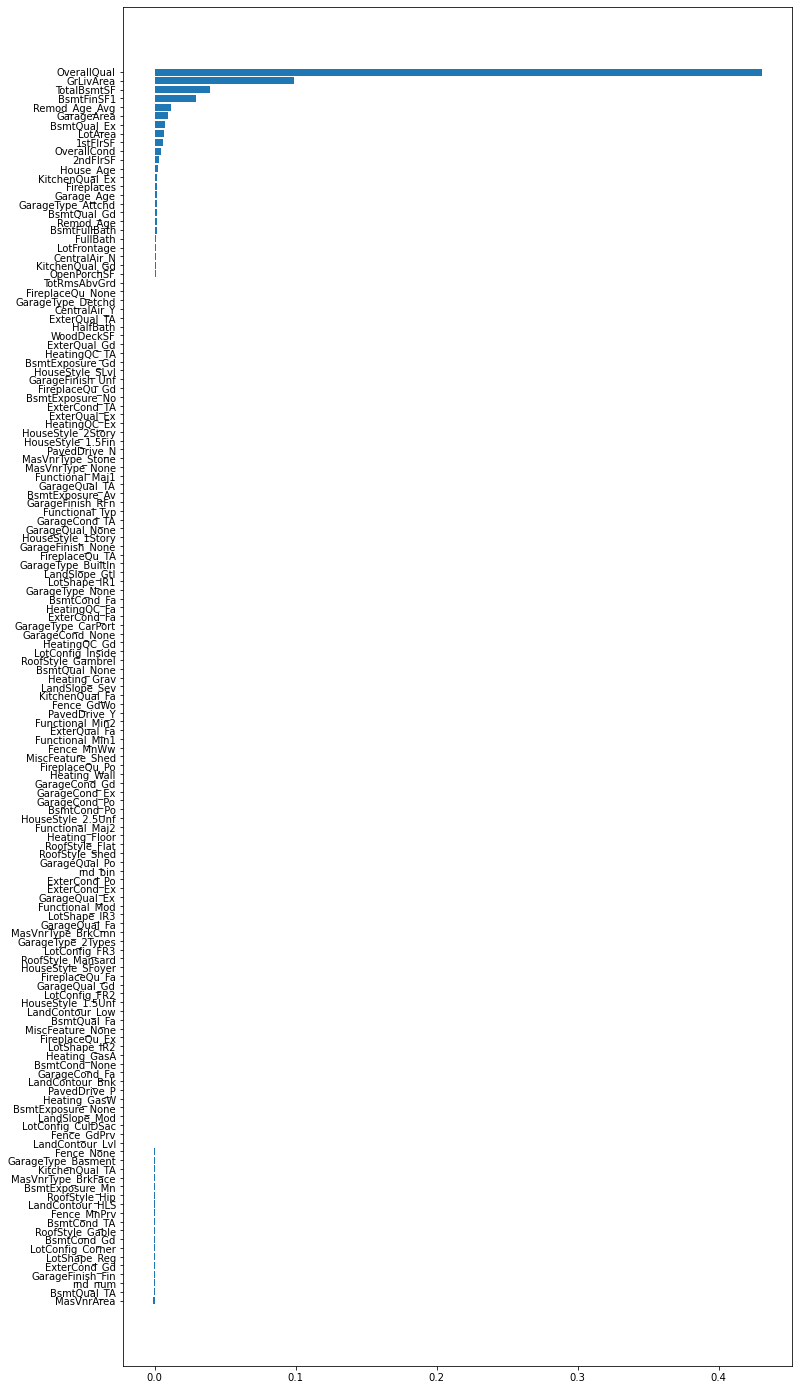

In [49]:
feat_imps = imp_new_params
indices = np.argsort(feat_imps)

fix,ax = plt.subplots(figsize=(12,25))
ax.barh(range(len(feat_imps)), feat_imps[indices])
ax.set_yticks(range(len(feat_imps)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [50]:
pd.Series(imp_new_params, index=X_train.columns).sort_values(ascending=False)

OverallQual           4.307258e-01
GrLivArea             9.910331e-02
TotalBsmtSF           3.916693e-02
BsmtFinSF1            2.937476e-02
Remod_Age_Avg         1.161461e-02
GarageArea            9.238260e-03
BsmtQual_Ex           7.667278e-03
LotArea               6.648783e-03
1stFlrSF              6.012239e-03
OverallCond           4.630165e-03
2ndFlrSF              2.933041e-03
House_Age             2.586144e-03
KitchenQual_Ex        2.011404e-03
Fireplaces            1.819962e-03
Garage_Age            1.646728e-03
GarageType_Attchd     1.587059e-03
BsmtQual_Gd           1.541042e-03
Remod_Age             1.488283e-03
BsmtFullBath          1.479032e-03
FullBath              1.130533e-03
LotFrontage           1.014148e-03
CentralAir_N          8.540456e-04
KitchenQual_Gd        7.551439e-04
OpenPorchSF           6.891310e-04
TotRmsAbvGrd          5.804337e-04
FireplaceQu_None      4.834627e-04
GarageType_Detchd     4.602254e-04
CentralAir_Y          4.464269e-04
ExterQual_TA        

In [51]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 60,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Our final features for our model will be: GrLivArea, TotalBsmtSF, GarageArea, 1stFlrSF, 2ndFlrSF, BsmtFinSF1, OpenPorchSF, LotArea, LotFrontage, WoodDeckSF

In [52]:
selected_features = ['SalePrice','Remod_Age_Avg','GrLivArea','OverallQual', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'LotArea','FullBath']

In [53]:
df[selected_features].head()

,SalePrice,Remod_Age_Avg,GrLivArea,OverallQual,TotalBsmtSF,GarageArea,1stFlrSF,2ndFlrSF,BsmtFinSF1,LotArea,FullBath
0,208500,-1.058828,0.692021,0.762179,-0.393202,0.460518,-0.754347,1.344658,0.682376,-0.217666,0.875418
1,181500,0.125345,-0.376695,0.011878,0.679639,0.024408,0.478393,-0.786663,1.339277,0.078136,0.875418
2,223500,-0.993041,0.873321,0.762179,-0.224084,0.757865,-0.560023,1.374606,0.151058,0.502548,0.875418
3,250000,-0.927253,1.856159,1.512479,0.370470,1.887784,0.123145,1.841300,0.559207,1.276779,0.875418
4,307000,-1.124615,0.653853,1.512479,1.800044,0.896627,1.790077,-0.786663,2.283573,0.202631,0.875418


In [54]:
#Saving final fetures to use in modeling
datapath = 'C:\Springboard_\CapstoneTwo\Data Files'
save_file(df[selected_features], 'final_features1.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)N

Please re-run this cell with a new filename.
